In [1]:
from games.mp import MP
from games.blotto import Blotto
from games.rps import RPS
from games.foraging import Foraging

from agents.fictitiousplay import FictitiousPlay
from agents.iql_agent import IQLAgent
from agents.jal_am_agent import JALAgent
from agents.random_agent import RandomAgent
from agents.regretmatching import RegretMatching

import matplotlib.pyplot as plt
import numpy as np
import time
from itertools import combinations
from collections import defaultdict, Counter

import wandb

MATCHING PENNIS

Combinaciones válidas:
* FictitiousPlay vs RandomAgent

* FictitiousPlay vs RegretMatching

* RandomAgent vs RegretMatching

Estocastic Games

FictiiousPlay VS RandomAgent in Matching Pennis

In [19]:
g = MP()
g.reset()

In [20]:
EPISODES = 100000

In [21]:
agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RandomAgent(game=g, agent="agent_1")

defined_agents = {
    "agent_0": agent0,
    "agent_1": agent1
}


In [22]:
action_counts = {agent: Counter() for agent in g.agents}
reward_history = {agent: [] for agent in g.agents}
reward_totals = {agent: 0 for agent in g.agents}

In [23]:
for i in range(EPISODES):
    actions = {agent: defined_agents[agent].action() for agent in g.agents}

    for agent, action in actions.items():
        action_counts[agent][action] += 1

    obs, rewards, terminations, truncations, infos = g.step(actions)

    for agent, reward in rewards.items():
        reward_totals[agent] += reward

    for agent in g.agents:
        avg = reward_totals[agent] / (i + 1)
        reward_history[agent].append(avg)


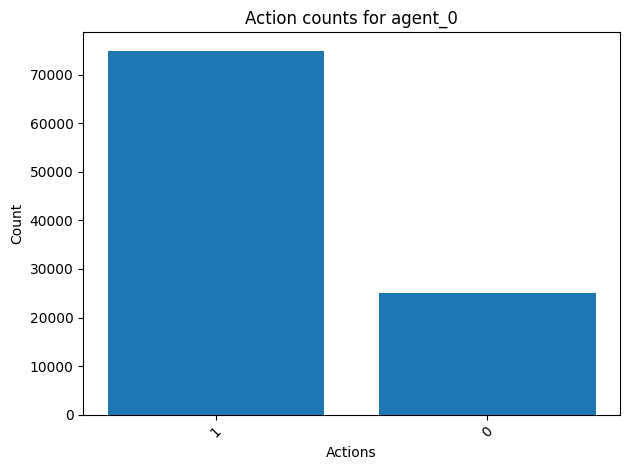

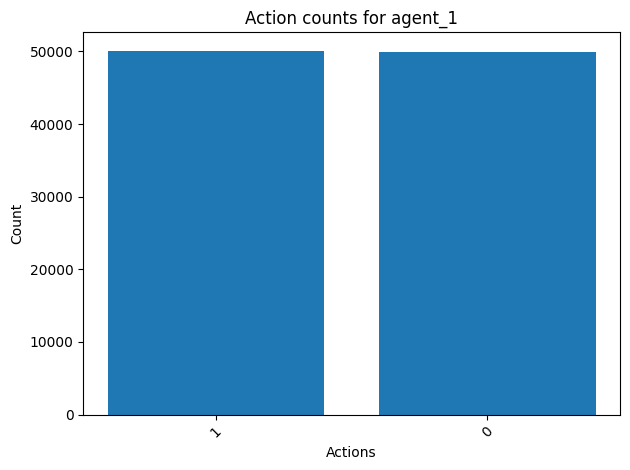

In [24]:
for agent, counter in action_counts.items():
    plt.figure()
    plt.bar([str(k) for k in counter.keys()], counter.values())  # convertir tuplas a str para etiquetas
    plt.title(f"Action counts for {agent}")
    plt.xlabel("Actions")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

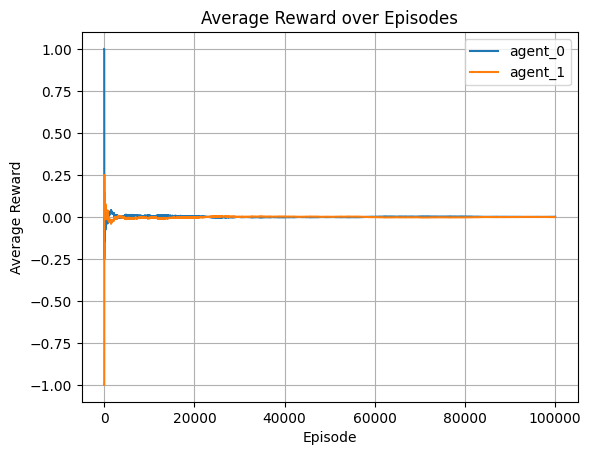

In [25]:
plt.figure()

for agent, history in reward_history.items():
    plt.plot(history, label=agent)

plt.title("Average Reward over Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

---

In [15]:
import wandb
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from games.mp import MP
from games.blotto import Blotto
from games.rps import RPS
from games.foraging import Foraging

from agents.fictitiousplay import FictitiousPlay
from agents.regretmatching import RegretMatching
from agents.random_agent import RandomAgent

In [ ]:
wandb.login(key="c03293e2ebd11c3bf68438723e4ec48e35e49226")

# Mapas
GAMES = {
    "MP": MP,
    "Blotto": Blotto,
    "RPS": RPS
}

AGENT_CLASSES = {
    "FictitiousPlay": FictitiousPlay,
    "RegretMatching": RegretMatching,
    "RandomAgent": RandomAgent
}

# Sweep config
sweep_config = {
    "method": "grid",
    "metric": {"name": "agent_0/avg_reward", "goal": "maximize"},
    "parameters": {
        "game": {"values": ["MP", "Blotto", "RPS"]},
        "agent_0": {"values": ["FictitiousPlay", "FictitiousPlay", "RegretMatching"]},
        "agent_1": {"values": ["RandomAgent", "RegretMatching", "RandomAgent"]},
        "episodes": {"value": 10000}
    }
}

sweep_id = wandb.sweep(sweep_config, project="comparison")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\landr\_netrc


Create sweep with ID: 3yup58tc
Sweep URL: https://wandb.ai/rizzo33-universidad-ort-uruguay/new-agent-comparison_v2/sweeps/3yup58tc


In [17]:
def sweep_run():
    run = wandb.init()
    config = run.config

    # Instanciar juego y agentes
    g = GAMES[config.game]()
    g.reset()

    agent0_class = AGENT_CLASSES[config.agent_0]
    agent1_class = AGENT_CLASSES[config.agent_1]

    agents = {
        "agent_0": agent0_class(game=g, agent="agent_0"),
        "agent_1": agent1_class(game=g, agent="agent_1")
    }

    reward_totals = {agent: 0 for agent in g.agents}
    reward_history = {agent: [] for agent in g.agents}
    actions_taken = {agent: [] for agent in g.agents}

    for episode in range(EPISODES):
        actions = {agent: agents[agent].action() for agent in g.agents}

        for agent, action in actions.items():
            actions_taken[agent].append(str(action))  # importante: string para histogramas

        obs, rewards, terminations, truncations, infos = g.step(actions)

        for agent, reward in rewards.items():
            reward_totals[agent] += reward

        for agent in g.agents:
            avg = reward_totals[agent] / (episode + 1)
            reward_history[agent].append(avg)

    # Log: histogramas de acciones
    for agent in g.agents:
        wandb.log({f"{agent}_actions_hist": wandb.Histogram(actions_taken[agent])})

    # Log: tabla resumen final de recompensas
    final_table = wandb.Table(columns=["Agent", "Total Reward", "Average Reward"])
    for agent in g.agents:
        avg = reward_totals[agent] / EPISODES
        final_table.add_data(agent, reward_totals[agent], avg)

    wandb.log({"final_rewards_summary": final_table})

    # Log: curva de reward promedio
    plt.figure()
    for agent, history in reward_history.items():
        plt.plot(history, label=agent)
    plt.title("Average Reward over Episodes")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.legend()
    plt.grid(True)
    wandb.log({"reward_plot": wandb.Image(plt)})
    plt.close()

    run.finish()

In [13]:
wandb.agent(sweep_id, function=sweep_run)


wandb: Agent Starting Run: pb486k0g with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: MP


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,▁▁█▁▁██████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/avg_reward,█▁▁▁▂▁▂▃▄▅▆▅▃▃▃▅▅▆▅▅▅▅▅▅▆▆▆▆▅▆▅▅▅▆▆▇▇▇▇▇
FictitiousPlay/reward,▁▁██▁▁██▁█▁████▁▁█▁███▁▁▁▁▁▁██▁▁█▁█▁▁▁█▁
RandomAgent/action_taken,▁███▁▁▁▁▁▁█▁▁▁█▁▁▁▁█▁▁███▁▁▁█▁██▁▁▁█▁▁▁█
RandomAgent/avg_reward,█▇████▄▄▂▃▄▆▆▆▆▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁
RandomAgent/reward,▁▁▁█▁▁▁▁▁█████▁██▁█▁██▁█▁▁▁▁▁▁▁▁▁▁▁████▁
agent_0/action_taken,▁▁▁▁▁█████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,█▆▃▃▂▁▂▁▁▂▂▃▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▃▃▃▃▃▃▃▃▄
agent_0/reward,▁██▁██▁▁█▁█████▁▁██▁████▁███▁██▁████▁█▁█
agent_1/action_taken,███▁█▁▁█▁████████▁▁██▁██▁▁███▁█▁█▁███▁▁▁
agent_1/avg_reward,█▄▅▄▇▇▇▆▇▇▄▃▄▄▅▅▆▅▅▃▃▃▃▃▃▃▃▃▃▄▂▃▃▃▃▂▂▂▂▁


wandb: Agent Starting Run: de9ke0id with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: Blotto


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RandomAgent/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RandomAgent/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RandomAgent/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: 3fb72h0c with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: RPS


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,█████▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/avg_reward,▁▇██▅▃▅▅▄▅▅▅▆▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▅▅▅▄▄▄▄▃▃▃
FictitiousPlay/reward,█▅▅▁█▅██▅▅▁▅▁█▅█▅█▁▁▁▅▁█▅▅█▅▁█▁▁▁▁███▅▅▅
RandomAgent/action_taken,▅▅████▅▁█▁▅▁▅██▁▁█▅█▅█▁▅▁▅▅▅███▁█▅█▁▁▅▁▅
RandomAgent/avg_reward,▁▇▅▅▆▅▃▅▅▄▅▅▅▅▅▆▇▇▇▇▇▆▆▆▆▅▅▆▆▆▇▇█▇▇█████
RandomAgent/reward,▁███▅██▁██▅▁██▅█▁▁█▁▅▁██▁▁▁██▅▁▅▅▅█▁██▁█
agent_0/action_taken,████▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,█▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/reward,███▅▁█▁▁█▅███▁▅█▅█▁▅████▁▅▁▁▁▁▁▅▁█████▁█
agent_1/action_taken,▅▁▅▅▁█▁█▅▅█▅█▁▁▁▁██▅▁█▅▁▁▁▁▅▅▁███▅▁▅█▅▅▁
agent_1/avg_reward,▁▆█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█


wandb: Agent Starting Run: adfzi5cl with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: MP


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,▁▁▁▁█▁█▁█▁▁▁▁▁█████████▁▁▁█▁███▁██▁████▁
FictitiousPlay/avg_reward,█▆▆▇▇▄▃▄▄▄▃▂▃▂▂▃▂▂▂▂▂▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
FictitiousPlay/reward,███▁██▁▁█▁█▁▁▁▁█▁▁▁▁▁▁▁██▁▁▁█▁▁▁██▁▁▁▁▁▁
RegretMatching/action_taken,█▁██████▁██▁███▁▁████▁█▁▁▁▁██▁█▁▁█▁▁▁███
RegretMatching/avg_reward,▁▂▅▅▅▆▇▆▇▆▇▇▇▇▆▇▇▇▇▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇██████
RegretMatching/reward,▁█████▁▁██▁▁████▁█▁▁██▁█▁███▁▁██▁▁▁██▁▁▁
agent_0/action_taken,▁▁▁▁█████▁▁█▁▁█▁█▁█▁██▁▁█████▁██████▁▁▁█
agent_0/avg_reward,█▁▃▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁
agent_0/reward,▁██▁▁▁█▁▁▁██▁█▁▁▁█▁▁▁▁██▁█▁█▁▁█▁▁▁▁███▁▁
agent_1/action_taken,▁▁▁█▁███▁█▁███▁▁██▁▁▁███▁███▁██▁██▁▁█▁▁█
agent_1/avg_reward,▆▁▁▂▃▅▅▅▆▆▇▆▆▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇█


wandb: Agent Starting Run: hp0mbhfi with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: Blotto


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
FictitiousPlay/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: sod41aof with config:
wandb: 	agent_0: FictitiousPlay
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: RPS


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


FictitiousPlay/action_taken,█▅▁▁▁▅▁█▁▁█▅▅▅▅▅▅▁▁█▁█▅▅▅▅▁▅██▁█▁▁▅▁▁█▁█
FictitiousPlay/avg_reward,▆▅▂▁█▂▄▆▅▂▄▄▄▆▅▅▅██▇▆▆▆▆▃▅▄▄▃▃▃▄▄▄▃▂▂▂▂▄
FictitiousPlay/reward,▁▁▁▅▁█▁▅▅▁█▅▅▅▁█▁█▅██▅▁▅█▅▅▅▅▅▅▁▅▁▁▁▅▅▅▁
RegretMatching/action_taken,▁█▁▅▅█▁▅▁█▁▅█▅▅█▁█▁████▅█▁▁▅▅▅▅▅██▁▁█▁█▁
RegretMatching/avg_reward,█▄▅▂▁▂▂▂▁▁▂▁▁▁▁▂▂▂▂▂▁▁▂▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂
RegretMatching/reward,▅▅▁▁▅▅▅▅▁▅▅█▁█▅▁▅▅█▅███▅████▅▅▁█▅█▁▁████
agent_0/action_taken,▁██▁▁██▁▁█▅██▅▅▁▁▅▁▅▁█▁██▁▁▅█▅▅█▁██▁▁▁▁▅
agent_0/avg_reward,▁▅██▇▅▅▅▅▇▆▇▇▇▇▆▆▆▆▆▇▆▆▆▆▆▆▇▇▇▆▆▆▆▆▆▆▆▆▆
agent_0/reward,▁▅▁█▁▁▅▅▁▅▅▁▅▁▁▁█▁▅█▅▁▁█▁█▁▁█▁▁▁▅▁▁▁▁▅▁▁
agent_1/action_taken,█▁▁▁▁█▁█▅▅█▅█▁▁▅█▅▅▅▅█▅▁▅█▁▅█▁█▁█▁▁▅▅▅▅█
agent_1/avg_reward,▁▃▄▇█▇▆▅▇▆▅▅▅▅▅▆▆▆▅▅▅▅▅▆▆▅▅▅▅▅▅▅▅▅▅▆▆▆▆▅


wandb: Agent Starting Run: omfx4tso with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: MP


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RandomAgent/action_taken,▁█▁█▁█████▁█████▁▁█▁█▁████▁▁█▁██▁▁█▁▁▁█▁
RandomAgent/avg_reward,▁▅▆▆█████▇▇▇▇▆▆▆▆▇▇▆▆▆▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆
RandomAgent/reward,▁▁▁███▁▁█▁▁█▁█████▁▁███▁▁▁████▁▁█▁█▁▁▁▁▁
RegretMatching/action_taken,▁▁▁▁▁▁█▁█▁█▁▁▁▁▁▁▁▁█▁▁██████▁▁▁█▁▁▁█▁▁▁█
RegretMatching/avg_reward,▂▆█▆▃▂▁▂▃▂▃▆▅▅▄▅▅▄▄▄▄▄▄▄▅▄▅▄▄▅▅▅▅▅▅▅▅▅▅▆
RegretMatching/reward,██▁█▁██▁▁▁▁▁██████▁█▁▁█▁▁▁▁█▁█████▁▁▁█▁█
agent_0/action_taken,▁████▁█▁█▁████▁███▁█▁▁▁██████▁█▁▁█▁█▁█▁█
agent_0/avg_reward,█▁▃▂▃▅▅▇▇▅▅▆▆▅▄▄▄▄▅▅▅▅▄▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
agent_0/reward,▁██▁████▁▁█▁█▁▁█████▁▁██▁▁██▁█▁▁▁▁████▁█
agent_1/action_taken,██▁███▁▁▁██▁▁▁▁▁██▁█▁▁▁▁▁█▁██▁▁██▁▁▁▁█▁▁
agent_1/avg_reward,▃▂▂▅█▇▇▇▆▆▄▃▁▂▄▃▂▂▃▅▅▄▄▄▄▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rxls0p7k with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: Blotto


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RandomAgent/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RandomAgent/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RandomAgent/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: o69aqllr with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RandomAgent
wandb: 	episodes: 10000
wandb: 	game: RPS


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RandomAgent/action_taken,▅██▅█▁▅▁▁█▁█▅▅█▁▁▁█▅██▁▁▁█▁▅█████▅▅▅▅█▁▅
RandomAgent/avg_reward,▁███████████████████████████████████████
RandomAgent/reward,▁█▁▅▁▁▅▅█▅█▁▅▁▁▁▁█▁█▅██▁▁▁▁█▅▅▁▁██▁▅▅█▅▁
RegretMatching/action_taken,█▅▅▅▅▁█▅▁▁█▅▁▁▅██▅▁▁█▅▅▁▅▅▅▅▅▅▁██▁█▅█▅▁▁
RegretMatching/avg_reward,██▄▄▃▂▁▂▁▂▁▂▂▃▂▃▃▂▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
RegretMatching/reward,▅▁▁▅█▅▁▅█▅▁█▅█▅▁▁▁▁▁▅▅▁▁▅▅█▁▅▅▁▁▁▅█▁▁█▁▁
agent_0/action_taken,▁▅██▁▅▁▁██▁█▁▁▁██▁▁▅▅▁▅█▁█▅▁▁█▅▅▅█▅▅▁▅▁▅
agent_0/avg_reward,▃▆█▅▄▃▁▁▂▁▂▁▂▃▂▄▃▃▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁
agent_0/reward,▁██▁▅▁▅▁█▅▁██▅▅▅█▁▁█▁▁█▅▅▁▅▁▁▅█▁▅█▅▁▁▁▁█
agent_1/action_taken,▁▁▁▁▅█▅█▁▁██████▅▁▅▁▅▅▅▁▁▅▅▅██▅▅█▁▁███▅▅
agent_1/avg_reward,▁▃▅▆██████▇▆▆▆▇▆▇▇▇▇▆▆▆█▇▇▇▇▇▇▇▇▇▇▇█████


wandb: Agent Starting Run: xssznx51 with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: MP


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RegretMatching/action_taken,▁▁▁▁▁█▁▁██▁█▁█████▁▁█▁█▁█▁▁█▁███▁███▁█▁█
RegretMatching/avg_reward,▁▆█▇▇▇▇▇▇▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
RegretMatching/reward,████▁█▁▁█▁▁██▁███▁██████▁█▁█▁▁█▁█▁██▁▁█▁
agent_0/action_taken,▁█▁▁▁████▁██▁▁▁██▁▁███▁█▁▁▁▁▁█▁▁▁█████▁▁
agent_0/avg_reward,█▄▁▃▃▅▅▅▄▅▅▅▅▄▄▅▅▅▅▅▅▅▅▅▄▄▄▅▄▄▅▅▅▅▄▄▄▄▄▄
agent_0/reward,███▁▁▁▁██▁█▁▁██▁█████▁▁██▁█████▁██▁█▁███
agent_1/action_taken,█▁▁██▁▁▁▁███▁███▁▁▁█▁█▁▁███▁▁▁▁▁███▁█▁██
agent_1/avg_reward,▁█▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
agent_1/reward,████▁▁▁█▁▁▁█▁▁▁▁█▁██▁▁▁▁▁█▁█▁█▁█▁█▁██▁██
episode,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▆▆▆▆▇▇▇▇█
RegretMatching/action_taken,1


wandb: Agent Starting Run: tqv5rumd with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: Blotto


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RegretMatching/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/action_taken,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/avg_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
episode,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇████
RegretMatching/action_taken,0


wandb: Agent Starting Run: olpn7vv6 with config:
wandb: 	agent_0: RegretMatching
wandb: 	agent_1: RegretMatching
wandb: 	episodes: 10000
wandb: 	game: RPS


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


RegretMatching/action_taken,▅█▅▅▁▁█▁▅▅▅▁█▁▅█▅██▁▅▁▅▅█████▁█▁▁▁█▅▁▁▅▁
RegretMatching/avg_reward,█▇▇▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
RegretMatching/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action_taken,█▁█▅▁█▅▁█▁▅█▅▁▅█▅▁████▁▁▁█▁██▅█▅▅▁██▁█▅▁
agent_0/avg_reward,▁▆▆▇▇▇▇▇▇███████████████████████████████
agent_0/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/action_taken,▅▅██▅▁▁▅▅▁▅▅▅█▁█▅▁██▁█▁▁▅▁▁▁█▁▁█▁▅██▁▅▅▁
agent_1/avg_reward,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_1/reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
episode,▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██
RegretMatching/action_taken,1


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


----

In [25]:
import wandb

In [26]:
TU_API_KEY="c03293e2ebd11c3bf68438723e4ec48e35e49226"

In [27]:
wandb.login(key=TU_API_KEY)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
EPISODES = 1000

In [ ]:
wandb.init(
    project="mp-agent-comparison",
    name="fictitious_vs_random",
    config={
        "episodes": EPISODES,
        "agent_0": "FictitiousPlay",
        "agent_1": "RandomAgent"
    }
)



In [29]:
for agent in g.agents:
    wandb.log({f"{agent}/avg_reward": reward_history[agent][-1]}, step=i)

    # Loggear acción si es simple (por ejemplo, entero)
    action = actions[agent]
    if isinstance(action, (int, float, str, np.integer, np.floating)):
        wandb.log({f"{agent}/action": action}, step=i)
    else:
        # Convertir a string si es una acción compuesta (ej: tupla, array)
        wandb.log({f"{agent}/action_str": str(action)}, step=i)


In [30]:
# Conteo de acciones
for agent, counter in action_counts.items():
    plt.figure()
    plt.bar([str(k) for k in counter.keys()], counter.values())
    plt.title(f"Action counts for {agent}")
    plt.xlabel("Actions")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Loggear imagen en W&B
    wandb.log({f"{agent}/action_counts": wandb.Image(plt)})
    plt.close()

# Reward promedio
plt.figure()
for agent, history in reward_history.items():
    plt.plot(history, label=agent)

plt.title("Average Reward over Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)

wandb.log({"reward_over_time": wandb.Image(plt)})
plt.close()

In [31]:
wandb.finish()


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


agent_0/action,▁
agent_0/avg_reward,▁
agent_1/action,▁
agent_1/avg_reward,▁
agent_0/action,0
agent_0/avg_reward,-0.086
agent_1/action,0
agent_1/avg_reward,0.086


In [7]:
def sweep_run(project="mp-game-analysis"):
    with wandb.init(project=project) as run:
        config = wandb.config

        g = MP()
        g.reset()

        # Elegís los agentes que quieras probar
        agent0 = FictitiousPlay(game=g, agent="agent_0")
        agent1 = RandomAgent(game=g, agent="agent_1")

        defined_agents = {
            "agent_0": agent0,
            "agent_1": agent1
        }

        EPISODES = config.episodes if "episodes" in config else 1000

        action_counts = {agent: Counter() for agent in g.agents}
        reward_history = {agent: [] for agent in g.agents}
        reward_totals = {agent: 0 for agent in g.agents}

        for i in range(EPISODES):
            g.reset()
            actions = {agent: defined_agents[agent].action() for agent in g.agents}

            # Guardar acciones
            for agent, action in actions.items():
                # Convertir acción a formato hashable
                if isinstance(action, (list, np.ndarray)):
                    action = tuple(action)
                action_counts[agent][action] += 1

            obs, rewards, terminations, truncations, infos = g.step(actions)

            for agent, reward in rewards.items():
                reward_totals[agent] += reward
                avg = reward_totals[agent] / (i + 1)
                reward_history[agent].append(avg)
                wandb.log({f"{agent}/avg_reward": avg}, step=i)

                # Loggeo adicional: acción si es simple
                if isinstance(actions[agent], (int, float, str, np.integer, np.floating)):
                    wandb.log({f"{agent}/action": actions[agent]}, step=i)

        # 🎯 Al final: graficar y subir imágenes
        for agent, counter in action_counts.items():
            plt.figure()
            plt.bar([str(k) for k in counter.keys()], counter.values())
            plt.title(f"Action counts for {agent}")
            plt.xlabel("Actions")
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()
            wandb.log({f"{agent}/action_counts_plot": wandb.Image(plt)})
            plt.close()

        # Gráfico final de rewards
        plt.figure()
        for agent, history in reward_history.items():
            plt.plot(history, label=agent)
        plt.title("Average Reward over Episodes")
        plt.xlabel("Episode")
        plt.ylabel("Average Reward")
        plt.legend()
        plt.grid(True)
        wandb.log({"reward_over_time": wandb.Image(plt)})
        plt.close()

        wandb.finish()


In [8]:
sweep_config = {
    "method": "grid",
    "parameters": {
        "episodes": {"values": [500, 1000]}
    }
}
sweep_id = wandb.sweep(sweep_config, project="mp-game-analysis")
wandb.agent(sweep_id, function=sweep_run, count=2)


Create sweep with ID: ir1k65f5
Sweep URL: https://wandb.ai/rizzo33-universidad-ort-uruguay/mp-game-analysis/sweeps/ir1k65f5


wandb: Agent Starting Run: 61d85kxb with config:
wandb: 	episodes: 500
wandb: Currently logged in as: cardlean94 (rizzo33-universidad-ort-uruguay) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


agent_0/action,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▄▄▃▆▆▆▇▆▇▆▅▄▄▅▃▃▃▅▅▅▅▆▆▆▇██████████████
agent_1/action,▁▁█▁▁▁▁▁▁█▁▁▁▁█▁██▁█▁█▁▁▁██▁▁▁▁▁▁█▁▁▁▁██
agent_1/avg_reward,█▅█▇▆▄▃▂▃▂▅▅▅▄▄▅▅▄▄▄▄▄▄▄▄▃▃▃▂▂▁▁▁▂▁▁▁▁▂▁
agent_0/action,0
agent_0/avg_reward,0.028
agent_1/action,0
agent_1/avg_reward,-0.028


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: pnwkcoly with config:
wandb: 	episodes: 1000


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


agent_0/action,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▇██▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇▇▇▇█████▇▇▇
agent_1/action,█▁▁▁█▁▁██▁██▁▁█▁█▁█▁▁▁█▁▁▁▁▁▁▁█▁▁██▁███▁
agent_1/avg_reward,█▅▄▁▂▅▅▅▄▄▅▅▃▃▃▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▃▃▃▃▃▃
agent_0/action,0
agent_0/avg_reward,0.028
agent_1/action,1
agent_1/avg_reward,-0.028


In [9]:
sweep_run()


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


agent_0/action,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/avg_reward,▁▄▅▅▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇████████████████████
agent_1/action,██▁▁█▁█▁██▁███▁▁██▁██▁██▁█▁▁▁███▁▁▁▁▁▁▁█
agent_1/avg_reward,█▄▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
agent_0/action,0
agent_0/avg_reward,0.034
agent_1/action,1
agent_1/avg_reward,-0.034


---

In [32]:
g = MP()
g.reset()

In [33]:
agent0 = FictitiousPlay(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents = {
    "agent_0": agent0,
    "agent_1": agent1
}

In [34]:
action_counts = {agent: Counter() for agent in g.agents}
reward_history = {agent: [] for agent in g.agents}
reward_totals = {agent: 0 for agent in g.agents}

In [35]:
for i in range(EPISODES):
    g.reset()

    actions = {
        agent: defined_agents[agent].action()
        for agent in g.agents
    }

    for agent, action in actions.items():
        action_counts[agent][action] += 1

    obs, rewards, terminations, truncations, infos = g.step(actions)

    for agent, reward in rewards.items():
        reward_totals[agent] += reward
        # Guardamos el promedio acumulado hasta ahora
        avg = reward_totals[agent] / (i + 1)
        reward_history[agent].append(avg)

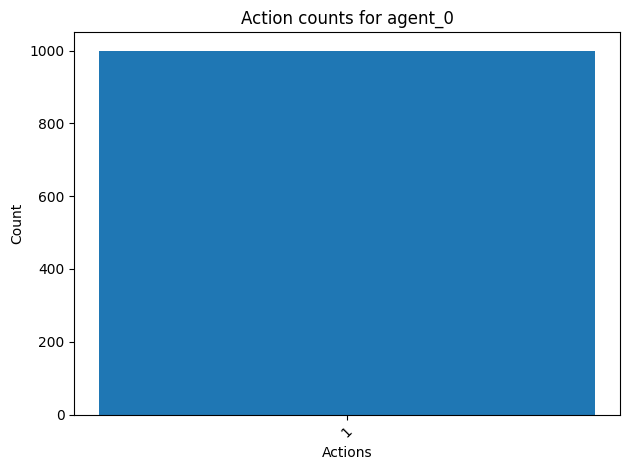

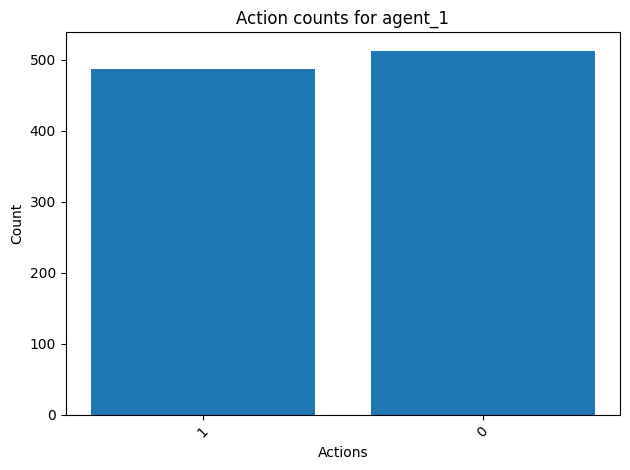

In [36]:
for agent, counter in action_counts.items():
    plt.figure()
    plt.bar([str(k) for k in counter.keys()], counter.values())  # convertir tuplas a str para etiquetas
    plt.title(f"Action counts for {agent}")
    plt.xlabel("Actions")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

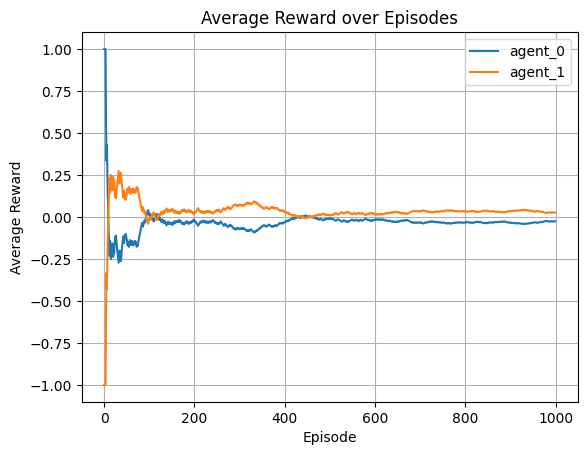

In [37]:
plt.figure()

for agent, history in reward_history.items():
    plt.plot(history, label=agent)

plt.title("Average Reward over Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
g = MP()
g.reset()

In [39]:
agent0 = RandomAgent(game=g, agent="agent_0")
agent1 = RegretMatching(game=g, agent="agent_1")

defined_agents = {
    "agent_0": agent0,
    "agent_1": agent1
}

In [40]:
action_counts = {agent: Counter() for agent in g.agents}
reward_history = {agent: [] for agent in g.agents}
reward_totals = {agent: 0 for agent in g.agents}

In [41]:
for i in range(EPISODES):
    g.reset()

    actions = {
        agent: defined_agents[agent].action()
        for agent in g.agents
    }

    for agent, action in actions.items():
        action_counts[agent][action] += 1

    obs, rewards, terminations, truncations, infos = g.step(actions)

    for agent, reward in rewards.items():
        reward_totals[agent] += reward
        # Guardamos el promedio acumulado hasta ahora
        avg = reward_totals[agent] / (i + 1)
        reward_history[agent].append(avg)

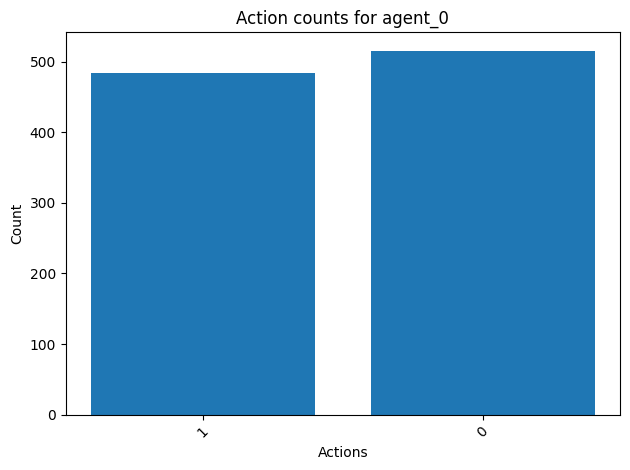

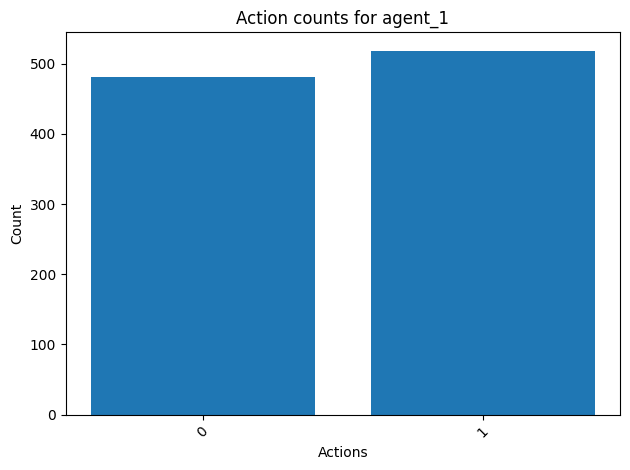

In [42]:
for agent, counter in action_counts.items():
    plt.figure()
    plt.bar([str(k) for k in counter.keys()], counter.values())  # convertir tuplas a str para etiquetas
    plt.title(f"Action counts for {agent}")
    plt.xlabel("Actions")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

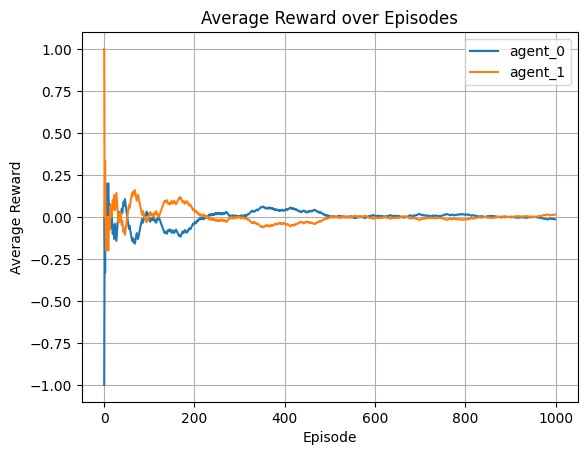

In [43]:
plt.figure()

for agent, history in reward_history.items():
    plt.plot(history, label=agent)

plt.title("Average Reward over Episodes")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.show()

------